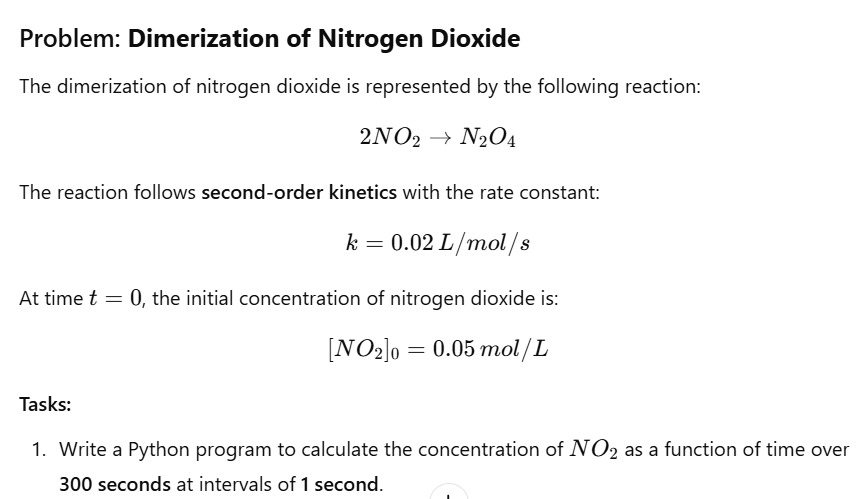
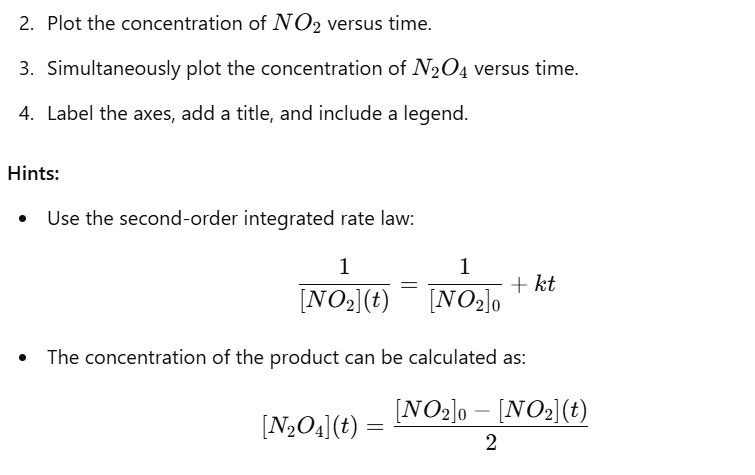

In [29]:
M0=0.05 #mol/L
k=0.02 #L/mol.s

def C_NO2_t(C0,t):
    return 1/(1/C0+k*t)
print(f'The concentration of NO2 after 300 seconds is {C_NO2_t(M0,300)}')

def C_N2O4_t(C0,t):
    return (C0 - C_NO2_t(C0,t))/2

The concentration of NO2 after 300 seconds is 0.038461538461538464


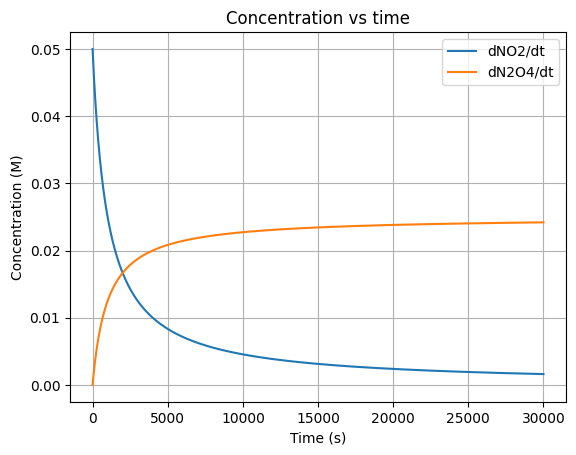

In [32]:
import numpy as np
import matplotlib.pyplot as plt

t=np.linspace(0,30000,100000)
C_NO2 = [C_NO2_t(M0,t_i) for t_i in t]
C_N2O4=[C_N2O4_t(M0,t_i) for t_i in t]
plt.plot(t, C_NO2, label='dNO2/dt');
plt.plot(t, C_N2O4, label ='dN2O4/dt')
plt.title('Concentration vs time')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.grid(True)
plt.legend();

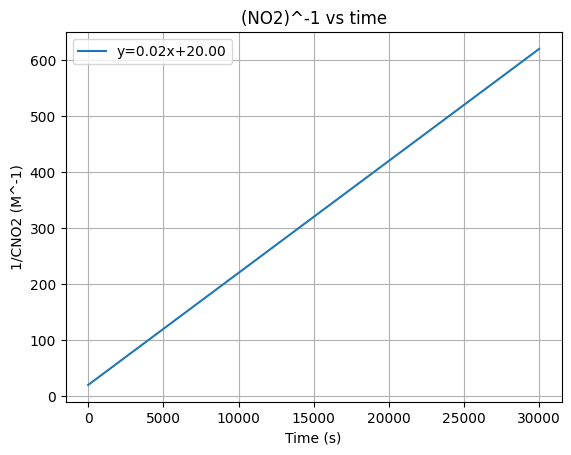

In [38]:
C_NO2_1 = [1/(C_NO2_t(M0,t_i)) for t_i in t]
from scipy.optimize import curve_fit
def func(a,x,b):
    return a*x+b
popt, pcov = curve_fit(func, t, C_NO2_1, p0=(0,1/M0))
line=f'y={popt[0]}x+{popt[1]:.2f}'

plt.plot(t, C_NO2_1, label=line);
plt.title('(NO2)^-1 vs time')
plt.xlabel('Time (s)')
plt.ylabel('1/CNO2 (M^-1)')
plt.grid(True)
plt.legend();